# Random Forest

#### Problem Statement:
* Tips & Travel.Com wants to expand its customer base by introducing a new Wellness Tourism Package. Currently, the company offers five packages, but only 18% of customers made a purchase last year, and marketing costs were high due to random customer outreach.
* The company now aims to use existing and potential customer data to target the right customers more effectively and reduce marketing expenditure while promoting the new wellness offering.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Importing dataset
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   str    
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   str    
 7   Gender                    4888 non-null   str    
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   str    
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   str    
 13  NumberOfTrips             4748 non-null   float64
 14  Passport           

### Data Cleaning

In [4]:
# Handling spelling mistakes
from pprint import pprint
d = {
    col:df[col].value_counts().to_dict()
    for col in df.columns
    if df[col].dtype == 'str'
}
pprint(d)

{'Designation': {'AVP': 342,
                 'Executive': 1842,
                 'Manager': 1732,
                 'Senior Manager': 742,
                 'VP': 230},
 'Gender': {'Fe Male': 155, 'Female': 1817, 'Male': 2916},
 'MaritalStatus': {'Divorced': 950,
                   'Married': 2340,
                   'Single': 916,
                   'Unmarried': 682},
 'Occupation': {'Free Lancer': 2,
                'Large Business': 434,
                'Salaried': 2368,
                'Small Business': 2084},
 'ProductPitched': {'Basic': 1842,
                    'Deluxe': 1732,
                    'King': 230,
                    'Standard': 742,
                    'Super Deluxe': 342},
 'TypeofContact': {'Company Invited': 1419, 'Self Enquiry': 3444}}


In [5]:
# Replacing spelling mistake & variation
df['Gender'] = df['Gender'].replace('Fe Male','Female') 
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried') 

In [6]:
# Handling Missing Values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
# % of missing values
features_with_na = [col for col  in df.columns if df[col].isnull().sum() >=1 ]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values.')

Age 4.62357 % missing values.
TypeofContact 0.51146 % missing values.
DurationOfPitch 5.13502 % missing values.
NumberOfFollowups 0.92062 % missing values.
PreferredPropertyStar 0.53191 % missing values.
NumberOfTrips 2.86416 % missing values.
NumberOfChildrenVisiting 1.35025 % missing values.
MonthlyIncome 4.76678 % missing values.


In [8]:
# Statistic on numerical column
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [9]:
# Imputing Missing Values

# * Impute Median value for Age column
df["Age"] = df["Age"].fillna(df["Age"].median())

# * Impute Mode for Type of Contact
df["TypeofContact"] = df["TypeofContact"].fillna(df["TypeofContact"].mode()[0])

# * Impute Median for Duration of Pitch
df["DurationOfPitch"] = df["DurationOfPitch"].fillna(df["DurationOfPitch"].median())

# * Impute Mode for NumberOfFollowups (Discrete Feature)
df["NumberOfFollowups"] = df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0])

# * Impute Mode for PreferredPropertyStar
df["PreferredPropertyStar"] = df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0])

# * Impute Median for NumberOfTrips
df["NumberOfTrips"] = df["NumberOfTrips"].fillna(df["NumberOfTrips"].median())

# * Impute Mode for NumberOfChildrenVisiting
df["NumberOfChildrenVisiting"] = df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0])

# * Impute Median for MonthlyIncome
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())


In [10]:
df.drop('CustomerID',inplace=True,axis=1)

In [11]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Feature Engineering

In [12]:
# Creating a total visiting 
df['TotalVisiting']=df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [13]:
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [14]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [20]:
# Get all numerical features
num_features = [col for col in df.columns if df[col].dtype != 'str']
print('Number of Numerical Features: ',len(num_features))
# Get all categorical features
cat_features = [col for col in df.columns if df[col].dtype == 'str']
print('Number of Categorical Features: ',len(cat_features))
# Get all discrete features
discrete_features = [col for col in num_features if len(df[col].unique()) <= 25 ]
print('Number of Discrete Features: ',len(discrete_features))
# Get all continuous features
continuous_features = [col for col in num_features if col not in discrete_features ]
print('Number of Continuous Features: ',len(continuous_features))

Number of Numerical Features:  12
Number of Categorical Features:  6
Number of Discrete Features:  9
Number of Continuous Features:  3


### Model Training

In [ ]:
# Independent and dependent features
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [24]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,

((3910, 17), (978, 17), (3910,), (978,))

In [26]:
# Creating column transformer with 4 types of transformer
cat_features = X.select_dtypes(include='str').columns   
num_features = X.select_dtypes(exclude='str').columns  

# Numerical scaling and categorical labeling together with column transformer # * it is use to scale multiple type together
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer,cat_features),
        ("StandardScaler", num_transformer,num_features)
    ]
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [30]:
# Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score, recall_score,f1_score, roc_auc_score,roc_curve

In [32]:
# Efficient Way to Train multiple model and get there performance
# * Creating Model instances
models={
    "RandomForestClassifier":RandomForestClassifier()
}
for i in range(len(list(models))):
    # * Model Training
    model = list(models.values())[i]
    model.fit(X_train,y_train) 
    # * Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # * Training Set Performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    # * Test Set Performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)  
    
    # * Report
    print(list(models.keys())[i])
    
    print("Model performance for Training Set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))  
    print("- Precision: {:.4f}".format(model_train_precision))  
    print("- Recall: {:.4f}".format(model_train_recall))  
    print("- ROc Auc Score: {:.4f}".format(model_train_rocauc_score))  
    print('-'*35)
    print("Model performance for Test Set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))  
    print("- Precision: {:.4f}".format(model_test_precision))  
    print("- Recall: {:.4f}".format(model_test_recall))  
    print("- ROc Auc Score: {:.4f}".format(model_test_rocauc_score)) 
    print('='*35)
    print('\n')

RandomForestClassifier
Model performance for Training Set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROc Auc Score: 1.0000
-----------------------------------
Model performance for Test Set
- Accuracy: 0.9243
- F1 Score: 0.9182
- Precision: 0.9606
- Recall: 0.6387
- ROc Auc Score: 0.8162




In [33]:
# HyperParameter Tuning
# * Parameters
rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [34]:
# Model list for HyperParameter Tuning
randomcv_models = [
    ("RF", RandomForestClassifier(),rf_params),
]

In [35]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(f"------------ Best Params for {model_name} ------------")
    print(model_param[model_name])
    

Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------ Best Params for RF ------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 15}


In [36]:
# Efficient Way to Train multiple model and get there performance
# * Creating Model instances
models={
    "RandomForestClassifier":RandomForestClassifier(n_estimators=500, min_samples_split = 2, max_features= 7, max_depth= 15)
}
for i in range(len(list(models))):
    # * Model Training
    model = list(models.values())[i]
    model.fit(X_train,y_train) 
    # * Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # * Training Set Performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    # * Test Set Performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)  
    
    # * Report
    print(list(models.keys())[i])
    
    print("Model performance for Training Set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))  
    print("- Precision: {:.4f}".format(model_train_precision))  
    print("- Recall: {:.4f}".format(model_train_recall))  
    print("- ROc Auc Score: {:.4f}".format(model_train_rocauc_score))  
    print('-'*35)
    print("Model performance for Test Set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))  
    print("- Precision: {:.4f}".format(model_test_precision))  
    print("- Recall: {:.4f}".format(model_test_recall))  
    print("- ROc Auc Score: {:.4f}".format(model_test_rocauc_score)) 
    print('='*35)
    print('\n')

RandomForestClassifier
Model performance for Training Set
- Accuracy: 0.9992
- F1 Score: 0.9992
- Precision: 1.0000
- Recall: 0.9959
- ROc Auc Score: 0.9979
-----------------------------------
Model performance for Test Set
- Accuracy: 0.9284
- F1 Score: 0.9228
- Precision: 0.9690
- Recall: 0.6545
- ROc Auc Score: 0.8247




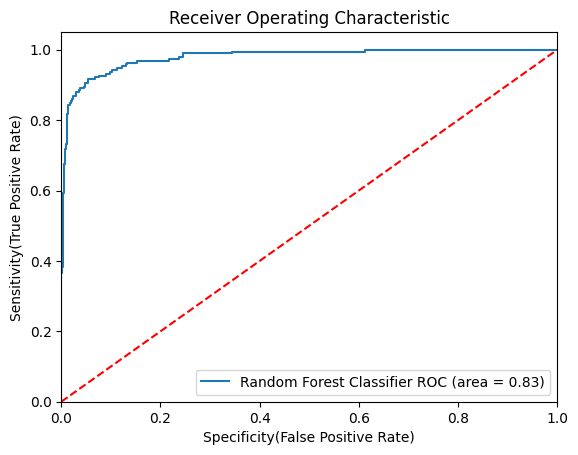

In [40]:
# Plotting Roc-Auc Curve
# *  Model List
auc_models = [
    {
        'label':'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=500, min_samples_split = 2, max_features= 7, max_depth= 15),
        'auc':0.8319
    },
]
# * Loop for the model list
for algo in auc_models:
    model  = algo['model']
    # Model Training
    model.fit(X_train,y_train)
    # Compute False Positive Rate, True Positive Rate
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    # Area under the curve 
    plt.plot(fpr,tpr,label ='%s ROC (area = %0.2f)' % (algo['label'],algo['auc']))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
    